In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
raw_df = pd.read_csv('weatherAUS.csv')

In [4]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [5]:
raw_df.dropna(subset=['RainToday' ,'RainTomorrow'] , inplace=True)

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [8]:
px.histogram( raw_df ,  x = 'Temp9am',title= 'temp at 9 am vs rain tomorrow',color='RainTomorrow')

In [9]:
px.histogram( raw_df ,  x = 'Location',title= 'location vs rain today',color='RainToday')

In [10]:
px.histogram( raw_df ,  x = 'RainTomorrow',title= 'rain tomorrow vs rain today',color='RainToday')

In [11]:
px.scatter(raw_df.sample(2000), title='min temp vs maxtemp' , x = 'MinTemp' , y = 'MaxTemp' , color  ='RainToday')

In [12]:
px.scatter(raw_df.sample(2000), title='temp at 3am  vs humidity (3pm)' , x = 'Temp9am' , y = 'Humidity3pm' , color  ='RainTomorrow')

In [13]:
use_sample = False

In [14]:
sample_fraction  = 0.1

In [15]:
if use_sample :
 raw_df = raw_df.sample(frac=sample_fraction).copy()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_val_df , test_df  = train_test_split(raw_df , test_size= 0.2 , random_state=42)
train_df , val_df = train_test_split(train_val_df , test_size= 0.25 , random_state=42)

In [18]:
print('train_df.shape :', train_df.shape)
print('val.shape :', val_df.shape)
print('test.shape :', test_df.shape)


train_df.shape : (84471, 23)
val.shape : (28158, 23)
test.shape : (28158, 23)


<Axes: xlabel='Date', ylabel='count'>

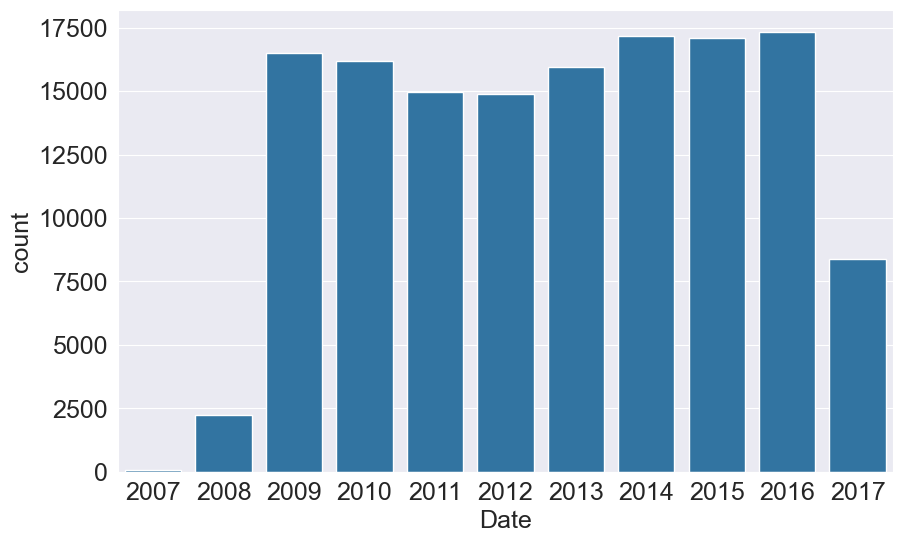

In [19]:
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

In [20]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df = raw_df[year == 2015]
test_df = raw_df[ year>2015]

In [21]:
print('train_df.shape :' ,train_df.shape)
print('val.shape :', val_df.shape)
print('test.shape :', test_df.shape)


train_df.shape : (97988, 23)
val.shape : (17089, 23)
test.shape : (25710, 23)


In [22]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [23]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [24]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [25]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [26]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [27]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [28]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [29]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [30]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [31]:
train_inputs[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(strategy= 'mean')

In [34]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [35]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

In [36]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [37]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [38]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_df[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_df[numeric_cols])

In [39]:
train_inputs[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6     5.472516   7.63054           44.0   
1           7.4     25.1       0.0     5.472516   7.63054           44.0   
2          12.9     25.7       0.0     5.472516   7.63054           46.0   
3           9.2     28.0       0.0     5.472516   7.63054           24.0   
4          17.5     32.3       1.0     5.472516   7.63054           41.0   
...         ...      ...       ...          ...       ...            ...   
144548     16.9     33.2       0.0     5.472516   7.63054           43.0   
144549     15.1     36.8       0.0     5.472516   7.63054           31.0   
144550     17.3     37.8       0.0     5.472516   7.63054           39.0   
144551     20.1     38.5       0.0     5.472516   7.63054           43.0   
144552     22.5     39.6       0.0     5.472516   7.63054           76.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
144548          24.0          26.0         22.0         13.0       1014.1   
144549          19.0          20.0         16.0          8.0       1012.6   
144550          26.0           9.0         15.0          8.0       1011.9   
144551          28.0          17.0         22.0          9.0       1014.0   
144552          30.0          13.0         16.0          9.0       1012.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1  8.000000   4.49925     16.9     21.8  
1            1007.8  4.431161   4.49925     17.2     24.3  
2            1008.7  4.431161   2.00000     21.0     23.2  
3            1012.8  4.431161   4.49925     18.1     26.5  
4            1006.0  7.000000   8.00000     17.8     29.7  
...             ...       ...       ...      ...      ...  
144548       1009.8  4.431161   4.49925     23.7     31.8  
144549       1007.6  4.431161   4.49925     28.9     34.8  
144550       1008.0  4.431161   4.49925     29.7     35.7  
144551       1009.2  4.431161   4.49925     29.8     37.2  
144552       1006.2  4.431161   4.49925     30.1     37.4  

[97988 rows x 16 columns]

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()

In [42]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [43]:
print('min:')
list(scaler.data_min_)

min:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [44]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [45]:
train_inputs[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483689      0.525947      0.006396      0.036949      0.525366   
std        0.149458      0.131904      0.022962      0.021628      0.200931   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.037741      0.526244   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.265107      0.108395      0.215668      0.686309      0.514693   
std         0.102420      0.068800      0.101424      0.189008      0.206376   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.690000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.612014      0.608705      0.483192      0.493693      0.507089   
std        0.111335      0.106611      0.255486      0.238028      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.614125      0.610527      0.492351      0.499917      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517103  
std        0.130726  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

In [46]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [47]:
from sklearn.preprocessing import OneHotEncoder

In [48]:
import sklearn
print(sklearn.__version__)


1.4.0


In [49]:
encoder  = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [50]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [51]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

In [52]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [53]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\1584174743.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

In [54]:
pd.set_option('display.max_columns' , None)

In [55]:
test_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2498     Albury  0.681604  0.801512  0.000000     0.037741  0.526244   
2499     Albury  0.693396  0.725898  0.001078     0.037741  0.526244   
2500     Albury  0.634434  0.527410  0.005930     0.037741  0.526244   
2501     Albury  0.608491  0.538752  0.042049     0.037741  0.526244   
2502     Albury  0.566038  0.523629  0.018329     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
145454    Uluru  0.283019  0.502836  0.000000     0.037741  0.526244   
145455    Uluru  0.266509  0.533081  0.000000     0.037741  0.526244   
145456    Uluru  0.285377  0.568998  0.000000     0.037741  0.526244   
145457    Uluru  0.327830  0.599244  0.000000     0.037741  0.526244   
145458    Uluru  0.384434  0.601134  0.000000     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2498           ENE       0.372093        NaN        ESE      0.000000   
2499           SSE       0.341085        SSE         SE      0.069231   
2500           ENE       0.325581        ESE        ENE      0.084615   
2501           SSE       0.255814         SE        SSE      0.069231   
2502           ENE       0.193798         SE        SSE      0.046154   
...            ...            ...        ...        ...           ...   
145454           E       0.193798        ESE          E      0.115385   
145455           E       0.193798         SE        ENE      0.100000   
145456         NNW       0.124031         SE          N      0.100000   
145457           N       0.240310         SE        WNW      0.069231   
145458          SE       0.170543        SSE          N      0.100000   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2498        0.080460         0.46         0.17     0.543802       0.5136   
2499        0.195402         0.54         0.30     0.505785       0.5008   
2500        0.448276         0.62         0.67     0.553719       0.6032   
2501        0.195402         0.74         0.65     0.618182       0.6304   
2502        0.103448         0.92         0.63     0.591736       0.5888   
...              ...          ...          ...          ...          ...   
145454      0.149425         0.59         0.27     0.730579       0.7056   
145455      0.126437         0.51         0.24     0.728926       0.6912   
145456      0.103448         0.56         0.21     0.710744       0.6720   
145457      0.103448         0.53         0.24     0.669421       0.6352   
145458      0.080460         0.51         0.24     0.642975       0.6304   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2498    0.777778  0.333333  0.702532  0.808061        No                0.0   
2499    0.888889  0.888889  0.675105  0.712092        No                0.0   
2500    0.888889  0.888889  0.611814  0.477927       Yes                0.0   
2501    0.888889  0.888889  0.556962  0.518234       Yes                0.0   
2502    0.888889  0.888889  0.514768  0.529750       Yes                0.0   
...          ...       ...       ...       ...       ...                ...   
145454  0.492351  0.499917  0.350211  0.504798        No                0.0   
145455  0.492351  0.499917  0.364979  0.533589        No                0.0   
145456  0.492351  0.499917  0.381857  0.573896        No                0.0   
145457  0.492351  0.499917  0.415612  0.604607        No                0.0   
145458  0.333333  0.222222  0.470464  0.602687        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2498                0.0              1.0                    0.0   
2499                0.0              1.0                    0.0   
2500                0.0              1.0                    0.0   
2501                0.0              1.0                    0.0   
2502                0.0              1.0                    0.0   
.

In [56]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [57]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [58]:
%%time
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: total: 109 ms
Wall time: 119 ms


In [59]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')
rain_targets = pd.read_parquet('train_targets.parquet')[target_col]
val_targets = pd.read_parquet('val_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

CPU times: total: 875 ms
Wall time: 484 ms


In [60]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


In [61]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134     Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135     Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136     Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137     Albury  0.648585  0.756144       0.0     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0     0.037741  0.526244   
144914    Uluru  0.625000  0.778828       0.0     0.037741  0.526244   
144915    Uluru  0.613208  0.792060       0.0     0.037741  0.526244   
144916    Uluru  0.672170  0.826087       0.0     0.037741  0.526244   
144917    Uluru  0.655660  0.797732       0.0     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW       0.186047        ESE          W      0.053846   
2134            NE       0.387597        ESE        ESE      0.069231   
2135           NNE       0.325581         NE          N      0.153846   
2136           NNE       0.271318        ESE          W      0.053846   
2137             E       0.209302        SSE         SE      0.053846   
...            ...            ...        ...        ...           ...   
144913           E       0.356589        ESE          E      0.269231   
144914         ESE       0.372093          E        ESE      0.230769   
144915           E       0.387597          E         SE      0.253846   
144916           E       0.410853          E        SSE      0.153846   
144917          SE       0.387597        ESE          S      0.153846   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.126437         0.45         0.14     0.545455       0.5424   
2134        0.103448         0.45         0.12     0.586777       0.5648   
2135        0.229885         0.35         0.19     0.618182       0.5632   
2136        0.080460         0.46         0.37     0.547107       0.5600   
2137        0.103448         0.60         0.34     0.609917       0.6016   
...              ...          ...          ...          ...          ...   
144913      0.229885         0.23         0.12     0.540496       0.5280   
144914      0.356322         0.17         0.07     0.565289       0.5408   
144915      0.252874         0.12         0.07     0.530579       0.4864   
144916      0.195402         0.12         0.12     0.441322       0.4080   
144917      0.321839         0.46         0.18     0.442975       0.4256   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2133    0.492351  0.499917  0.594937  0.731286        No                0.0   
2134    0.492351  0.499917  0.691983  0.836852        No                0.0   
2135    0.492351  0.499917  0.767932  0.813820        No                0.0   
2136    0.888889  0.555556  0.729958  0.696737        No                0.0   
2137    0.888889  0.499917  0.691983  0.727447        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144913  0.492351  0.499917  0.664557  0.737044        No                0.0   
144914  0.492351  0.499917  0.715190  0.775432        No                0.0   
144915  0.492351  0.499917  0.744726  0.769674        No                0.0   
144916  0.492351  0.111111  0.812236  0.840691        No                0.0   
144917  0.492351  0.499917  0.696203  0.790787        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2133                0.0              1.0                    0.0   
2134                0.0              1.0                    0.0   
2135                0.0              1.0                    0.0   
2136                0.0              1.0                    0.0   
2137                0.0              1.0                    0.0   
.

In [62]:
val_inputs

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
2133     Albury  0.469340  0.724008       0.0     0.037741  0.526244   
2134     Albury  0.566038  0.839319       0.0     0.037741  0.526244   
2135     Albury  0.603774  0.814745       0.0     0.037741  0.526244   
2136     Albury  0.813679  0.716446       0.0     0.037741  0.526244   
2137     Albury  0.648585  0.756144       0.0     0.037741  0.526244   
...         ...       ...       ...       ...          ...       ...   
144913    Uluru  0.683962  0.746692       0.0     0.037741  0.526244   
144914    Uluru  0.625000  0.778828       0.0     0.037741  0.526244   
144915    Uluru  0.613208  0.792060       0.0     0.037741  0.526244   
144916    Uluru  0.672170  0.826087       0.0     0.037741  0.526244   
144917    Uluru  0.655660  0.797732       0.0     0.037741  0.526244   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
2133           WSW       0.186047        ESE          W      0.053846   
2134            NE       0.387597        ESE        ESE      0.069231   
2135           NNE       0.325581         NE          N      0.153846   
2136           NNE       0.271318        ESE          W      0.053846   
2137             E       0.209302        SSE         SE      0.053846   
...            ...            ...        ...        ...           ...   
144913           E       0.356589        ESE          E      0.269231   
144914         ESE       0.372093          E        ESE      0.230769   
144915           E       0.387597          E         SE      0.253846   
144916           E       0.410853          E        SSE      0.153846   
144917          SE       0.387597        ESE          S      0.153846   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
2133        0.126437         0.45         0.14     0.545455       0.5424   
2134        0.103448         0.45         0.12     0.586777       0.5648   
2135        0.229885         0.35         0.19     0.618182       0.5632   
2136        0.080460         0.46         0.37     0.547107       0.5600   
2137        0.103448         0.60         0.34     0.609917       0.6016   
...              ...          ...          ...          ...          ...   
144913      0.229885         0.23         0.12     0.540496       0.5280   
144914      0.356322         0.17         0.07     0.565289       0.5408   
144915      0.252874         0.12         0.07     0.530579       0.4864   
144916      0.195402         0.12         0.12     0.441322       0.4080   
144917      0.321839         0.46         0.18     0.442975       0.4256   

        Cloud9am  Cloud3pm   Temp9am   Temp3pm RainToday  Location_Adelaide  \
2133    0.492351  0.499917  0.594937  0.731286        No                0.0   
2134    0.492351  0.499917  0.691983  0.836852        No                0.0   
2135    0.492351  0.499917  0.767932  0.813820        No                0.0   
2136    0.888889  0.555556  0.729958  0.696737        No                0.0   
2137    0.888889  0.499917  0.691983  0.727447        No                0.0   
...          ...       ...       ...       ...       ...                ...   
144913  0.492351  0.499917  0.664557  0.737044        No                0.0   
144914  0.492351  0.499917  0.715190  0.775432        No                0.0   
144915  0.492351  0.499917  0.744726  0.769674        No                0.0   
144916  0.492351  0.111111  0.812236  0.840691        No                0.0   
144917  0.492351  0.499917  0.696203  0.790787        No                0.0   

        Location_Albany  Location_Albury  Location_AliceSprings  \
2133                0.0              1.0                    0.0   
2134                0.0              1.0                    0.0   
2135                0.0              1.0                    0.0   
2136                0.0              1.0                    0.0   
2137                0.0              1.0                    0.0   
.

In [63]:
val_targets

2133      No
2134      No
2135      No
2136      No
2137      No
          ..
144913    No
144914    No
144915    No
144916    No
144917    No
Name: RainTomorrow, Length: 17089, dtype: object

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
model = LogisticRegression(solver ='liblinear')

In [66]:
model.fit(train_inputs[numeric_cols+encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [67]:
print(numeric_cols+encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [68]:
print(model.coef_.tolist())

[[0.8986308002452182, -2.879913538443791, 3.162777956818172, 0.8542486637990024, -1.6713936984280255, 6.764403625179511, -0.9423230444541897, -1.4284295765589983, 0.32289118157567265, 5.995314288483543, 5.463858423022677, -9.176805735047797, -0.16229562054656804, 1.287660288276757, 0.4747157074045784, 2.0214281614192506, 0.6016497596739161, -0.5524831798037626, 0.4781424032757727, 0.007670396724624665, 0.34681430424880194, -0.3522766596596351, 0.17971035153725215, 0.44048607241330895, -0.013982060855344081, 0.02894395945438773, 0.2581475933452195, -0.021205022131037494, -0.0427956487535714, -0.48314197245493656, -0.13756293427042146, -0.576058752109573, -0.7875250071020348, -0.25540463982587636, -0.32888310401815035, -0.5690035772441047, 0.08183007620725609, 0.013382258947438365, 0.06412772846083675, -0.9020543330294697, -0.44433049824733895, 0.008516284926463266, -0.4606124125584055, -0.46551777101469244, -0.06949837730876927, 0.1911589879297482, 0.4504754369000983, 0.6081211545498856

In [69]:
print(model.intercept_)

[-2.44955411]


In [70]:
n = len(model.coef_.tolist())
weight_df = pd.DataFrame({
    
    'feature' : (numeric_cols+ encoded_cols),
    'weight' :  model.coef_.tolist()[0]
})

In [71]:
print(model.intercept_)

[-2.44955411]


<Axes: xlabel='weight', ylabel='feature'>

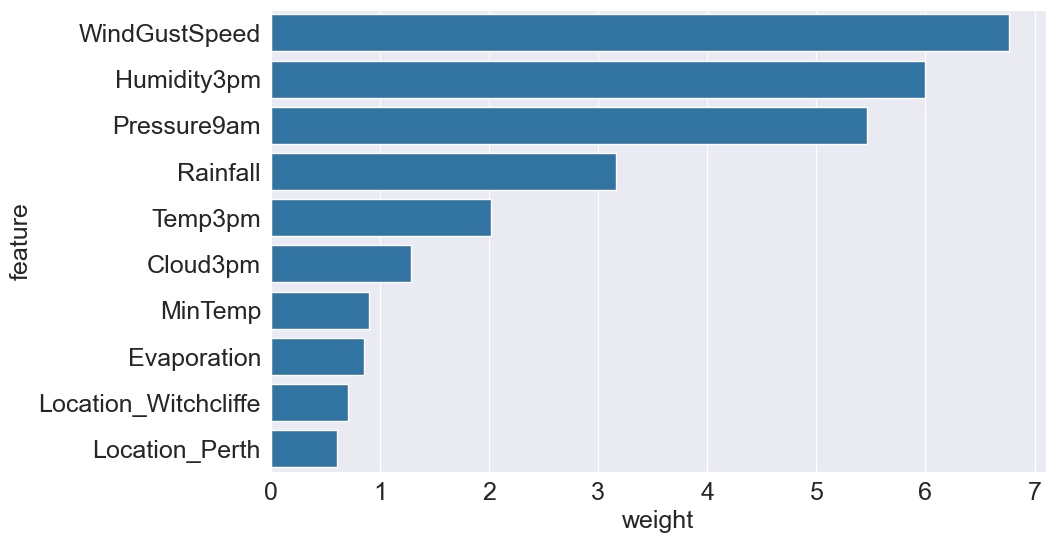

In [72]:
 # plt.figure(figsize = (10,50))
sns.barplot(data=weight_df.sort_values( 'weight',ascending=False).head(10) , x= 'weight' ,y = 'feature')

In [73]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val =  val_inputs[numeric_cols+encoded_cols]
x_test = test_inputs[numeric_cols+encoded_cols]

In [74]:
train_predicts= model.predict(x_train)

In [75]:
x_predicts =  model.predict(x_test)

In [76]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(test_targets, x_predicts)

0.8420070011668611

In [79]:
train_prob = model.predict_proba(x_test)
train_prob

array([[0.92781625, 0.07218375],
       [0.83056138, 0.16943862],
       [0.47968269, 0.52031731],
       ...,
       [0.99138769, 0.00861231],
       [0.97699545, 0.02300455],
       [0.98813904, 0.01186096]])

In [80]:
model.classes_

array(['No', 'Yes'], dtype=object)

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(test_targets, x_predicts ,normalize='true')

array([[0.94739754, 0.05260246],
       [0.51776824, 0.48223176]])

In [83]:
def predict_and_plot(inputs , targets , name='') :
    
    preds = model.predict(inputs)
    accuracy =  accuracy_score(targets, preds)
    print("accuracy : {:.2f}%".format(accuracy*100))
    cf = confusion_matrix(targets,preds, normalize='true')
    plt.figure(figsize=(5,4))
    
    sns.heatmap(cf, annot=True)
    
    plt.xlabel('predicts')
    plt.ylabel('Target')
    plt.title('{} confusion matrix '.format(name));
    return preds


accuracy : 84.20%


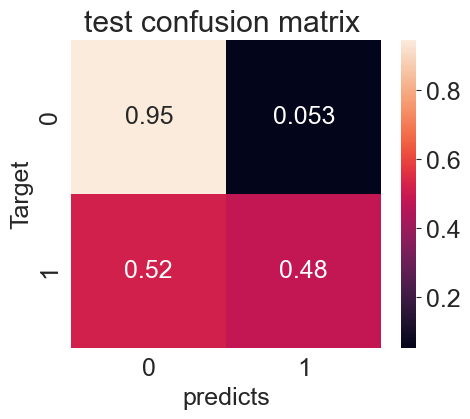

In [84]:

test_preds = predict_and_plot(x_test , test_targets, 'test')

accuracy : 85.40%


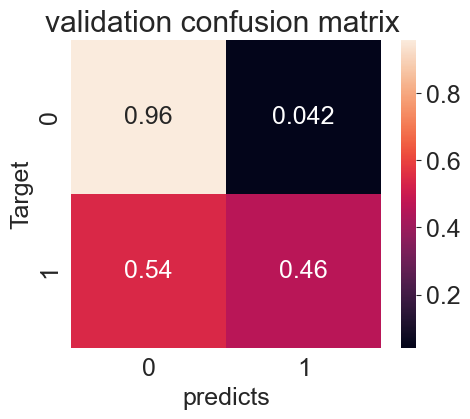

In [85]:
val_preds = predict_and_plot(x_val, val_targets, 'validation')

accuracy : 85.19%


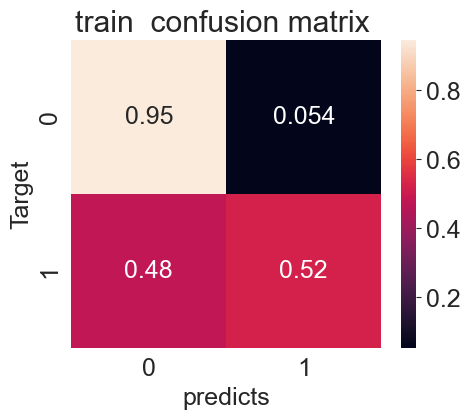

In [86]:
train_pred =  predict_and_plot(x_train, train_targets, 'train ')

In [87]:
def all_no(inputs):
    return np.full(len(inputs), "No")

In [88]:
def random_guess(inputs):
    return np.random.choice(["No", "Yes"], len(inputs))

In [89]:
accuracy_score(test_targets, random_guess(x_test))

0.4984441851419681

In [90]:
accuracy_score(test_targets, all_no(x_test))

0.7734344612991054

In [91]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [92]:
new_input_df = pd.DataFrame([new_input])

In [93]:
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0         NNW           52.0         NW        NNE          13.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          20.0         89.0         58.0       1004.8       1001.5       8.0   

   Cloud3pm  Temp9am  Temp3pm RainToday  
0       5.0     25.7     33.0       Yes

In [94]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\4090555460.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

In [95]:
x_new_input = new_input_df[numeric_cols+encoded_cols]
x_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.747642  0.718336  0.027493     0.028966  0.526244       0.356589   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           0.1      0.229885         0.89         0.58     0.401653   

   Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  Location_Adelaide  \
0       0.3904  0.888889  0.555556  0.694093  0.737044                0.0   

   Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              0.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  \
0                0.0              0.0                0.0             0.0   

   Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  \
0                    0.0                0.0              0.0   

   Location_GoldCoast  Location_Hobart  Location_Katherine  \
0                 0.0              0.0                 1.0   

   Location_Launceston  Location_Melbourne  Location_MelbourneAirport  \
0                  0.0                 0.0                        0.0   

   Location_Mildura  Location_Moree  Location_MountGambier  \
0               0.0             0.0                    0.0   

   Location_MountGinini  Location_Newcastle  Location_Nhil  \
0                   0.0                 0.0            0.0   

   Location_NorahHead  Location_NorfolkIsland  Location_Nuriootpa  \
0                 0.0                     0.0                 0.0   

   Location_PearceRAAF  Location_Penrith  Location_Perth  \
0                  0.0               0.0             0.0   

   Location_PerthAirport  Location_Portland  Location_Richmond  Location_Sale  \
0                    0.0                0.0                0.0            0.0   

   Location_SalmonGums  Location_Sydney  Location_SydneyAirport  \
0                  0.0              0.0                     0.0   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                  0.0                   0.0             0.0   

   Location_WaggaWagga  Location_Walpole  Location_Watsonia  \
0                  0.0               0.0                0.0   

   Location_Williamtown  Location_Witchcliffe  Location_Wollongong  \
0                   0.0                   0.0                  0.0   

   Location_Woomera  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  \
0               0.0            0.0              0.0              0.0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0            0.0             0.0              0.0              1.0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0             0.0            0.0             0.0              0.0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0              0.0             0.0            0.0              0.0   

   WindGustDir_WSW  WindGustDir_nan  WindDir9am_E  WindDir9am_ENE  \
0              0.0              0.0           0.0             0.0   

   WindDir9am_ESE  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0             0.0           0.0            0.0             0.0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0             0.0            1.0           0.0            0.0             0.0   

   WindDir9am_SSW  WindDir9am_SW  WindDir9am_W  WindDir9am_WNW  \
0             0.0            0.0           0.0             0.0   

   WindDir9am_WSW  WindDir9am_nan  WindDir3pm_E  WindDir3pm_ENE  \
0             0.0             0.0           0.0             0.0   

   WindDir3pm_ESE  WindDir3pm_N  WindDir3pm_NE  WindDir3pm_NNE  \
0             0.0           0.0            0.0             1.0   

   WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
0             0.0            0.0           0.0           

In [96]:
preiction = model.predict(x_new_input)[0]

In [97]:
preiction

'Yes'

In [98]:
prob = model.predict_proba(x_new_input)[0]

In [99]:
prob

array([0.48102614, 0.51897386])

In [104]:
def predict_input(single_input):
 input_df = pd.DataFrame([single_input])
 
 input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
 input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
 input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
 A = (input_df[numeric_cols+encoded_cols])
 pred = model.predict(A)[0]
 prob = model.predict_proba(A)[0] [list(model.classes_).index(pred)]
 return pred, prob 

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [105]:
predict_input(new_input)

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\4137003919.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\4137003919.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_844\4137003919.py:6: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

('Yes', 0.5189738584293045)

In [106]:
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [108]:
import joblib

In [110]:
aussie_rain = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [111]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [112]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [113]:
test_preds2 = aussie_rain2['model'].predict(x_test)
accuracy_score(test_targets,test_preds2)

0.8420070011668611